<a href="https://colab.research.google.com/github/Masha1304/OZON-test-tasks/blob/main/OZON_test_tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task 1

To complete this task, you need to generate a DataFrame with synthetic data. The DataFrame should consist of 10,000 rows and 5 columns. We suggest you create and fill each column as follows:

1st column – user_id – the user identifier. The length of user_id should be 15 characters. The identifier consists of a random combination of the following characters: "1234567890abcdefghijk". For each row in the DataFrame, the user_id value should be generated randomly.

2nd column – order_number – the order number. The column should be filled with random values in the range from 1 to 10.

3rd column – click2delivery – the time elapsed from the order being placed to it being delivered to the customer. The column should be filled with random values from a normal distribution with a mean of 1440 and a standard deviation of 200.

4th column – order_items_sum – the total cost of the order. The values for this column should be taken from an exponential distribution with a parameter λ = 1, shifted by +1.

5th column – retention – the day of the customer's life on which they made the order. You need to generate the values 1, 2, 3, 4, 5 with probabilities 0.35, 0.25, 0.2, 0.15, and 0.05 respectively.

If duplicate values appear in the user_id column, only keep the first one.



In [41]:
import pandas as pd
import random
import numpy as np
import seaborn as sns

In [42]:
#generating user ids from the following list "1234567890abcdefghijk"
def generating_user_id(n=15):
  return "".join([random.choice("1234567890abcdefghijk") for _ in range(15)])

In [43]:
N = 10_000
n = 10_000

def generating_df(N):
  data = {
      "user_id": [generating_user_id() for _ in range(N)],
      "order_num": [random.randint(1, 10) for _ in range(N)],
      "click2delivery": np.random.normal(1440, 200, size=N),
      "order_items_sum": np.random.exponential(1, size=N) + 1,
      "retention": np.random.choice([1, 2, 3, 4, 5], size=N, p=[0.35, 0.25, 0.2, 0.15, 0.05])
  }
  return pd.DataFrame(data)

df = pd.DataFrame()

while True:
  new_df = generating_df(n)
  df = pd.concat([df, new_df], ignore_index=True)
  df = df.drop_duplicates(subset="user_id", keep="first")
  n = N - len(df)

  if n <= 0:
    break

In [44]:
df

,user_id,order_num,click2delivery,order_items_sum,retention
0,8c9j50b5d0a3f00,4,1240.834542,1.925447,3
1,12f58g6cah752ah,2,1564.659540,2.493542,1
2,64319jd9ak20b33,10,1600.699793,1.435912,1
3,d31h0dc4gg443g7,1,1398.935954,1.042754,4
4,fgdh07h8d88cde3,1,1704.490459,1.930230,1
...,...,...,...,...,...
9995,d78ajedgd691e4h,10,1533.667390,4.839065,3
9996,0ddi75f4hk2ajjc,5,1267.102444,1.933508,4
9997,e0ia6iah404ag8f,9,1513.990397,1.789650,1
9998,9j38bfji7a19ff2,10,1276.818389,2.074764,1


## Task 2

For all rows in the original dataset, grouped by order number, calculate the average delivery time for each group. The result should be added to a new column in the DataFrame.

In [45]:
orders = (
    df
    .groupby("order_num")["click2delivery"]
    .agg(mean_time="mean")
    .reset_index()
)

In [46]:
orders

,order_num,mean_time
0,1,1436.249868
1,2,1444.630847
2,3,1450.155926
3,4,1453.269860
4,5,1434.197793
5,6,1438.204841
6,7,1436.255451
7,8,1436.950597
8,9,1443.557509
9,10,1450.259140


In [47]:
df = df.merge(
    orders,
    how="inner"
)

In [48]:
df

,user_id,order_num,click2delivery,order_items_sum,retention,mean_time
0,8c9j50b5d0a3f00,4,1240.834542,1.925447,3,1453.269860
1,c6ga25ah8f151k4,4,1129.547356,1.520074,1,1453.269860
2,8ec7375e4dha73i,4,1882.767465,1.437030,2,1453.269860
3,aa0fc80heebicb0,4,1618.305341,1.638193,2,1453.269860
4,9a87831f2b271e2,4,1213.617469,1.133317,1,1453.269860
...,...,...,...,...,...,...
9995,7j9jk8g9124633k,6,1510.849412,1.547901,3,1438.204841
9996,ajfhfbaa5jkdi14,6,1453.868955,1.448770,1,1438.204841
9997,92b5g9dhbhfbb63,6,1513.817145,3.293857,4,1438.204841
9998,629c60fjh20fd12,6,1561.483835,1.342809,2,1438.204841


## Task 3

Add a separate column with values of a sequence starting with 0 and 1, where each subsequent element is the sum of the two previous elements multiplied by 0.5.

In [49]:
arr = [0, 1]

for i in range(9998):
  arr.append(sum(arr[-2:]) * 0.5)

In [50]:
df["sequence"] = arr

In [51]:
df

,user_id,order_num,click2delivery,order_items_sum,retention,mean_time,sequence
0,8c9j50b5d0a3f00,4,1240.834542,1.925447,3,1453.269860,0.000000
1,c6ga25ah8f151k4,4,1129.547356,1.520074,1,1453.269860,1.000000
2,8ec7375e4dha73i,4,1882.767465,1.437030,2,1453.269860,0.500000
3,aa0fc80heebicb0,4,1618.305341,1.638193,2,1453.269860,0.750000
4,9a87831f2b271e2,4,1213.617469,1.133317,1,1453.269860,0.625000
...,...,...,...,...,...,...,...
9995,7j9jk8g9124633k,6,1510.849412,1.547901,3,1438.204841,0.666667
9996,ajfhfbaa5jkdi14,6,1453.868955,1.448770,1,1438.204841,0.666667
9997,92b5g9dhbhfbb63,6,1513.817145,3.293857,4,1438.204841,0.666667
9998,629c60fjh20fd12,6,1561.483835,1.342809,2,1438.204841,0.666667


## Task 4

Write a function that takes a user_id as input and returns a string in the following format: all the letters in the order they appear in the user_id, followed by the square of the number formed from all the digits in the order they appear in the user_id.

Add the result of applying this function to the user_id in a new column. Using loops outside the function is not allowed.

In [52]:
def processing_user_id(user_id):
  letters = "".join(filter(str.isalpha, user_id))
  digits = "".join(filter(str.isdigit, user_id))

  return f"{letters}{int(digits) ** 2}"

In [53]:
df["new_user_id"] = df["user_id"].apply(processing_user_id)

In [54]:
df

,user_id,order_num,click2delivery,order_items_sum,retention,mean_time,sequence,new_user_id
0,8c9j50b5d0a3f00,4,1240.834542,1.925447,3,1453.269860,0.000000,cjbdaf801115039530090000
1,c6ga25ah8f151k4,4,1129.547356,1.520074,1,1453.269860,1.000000,cgaahfk3916445894532196
2,8ec7375e4dha73i,4,1882.767465,1.437030,2,1453.269860,0.500000,ecedhai7634473281973729
3,aa0fc80heebicb0,4,1618.305341,1.638193,2,1453.269860,0.750000,aafcheebicb640000
4,9a87831f2b271e2,4,1213.617469,1.133317,1,1453.269860,0.625000,afbe9758105332734050234944
...,...,...,...,...,...,...,...,...
9995,7j9jk8g9124633k,6,1510.849412,1.547901,3,1438.204841,0.666667,jjkgk63826112401607384689
9996,ajfhfbaa5jkdi14,6,1453.868955,1.448770,1,1438.204841,0.666667,ajfhfbaajkdi264196
9997,92b5g9dhbhfbb63,6,1513.817145,3.293857,4,1438.204841,0.666667,bgdhbhfbb857407477369
9998,629c60fjh20fd12,6,1561.483835,1.342809,2,1438.204841,0.666667,cfjhfd396398693514448144


## Task 5

Calculate the mode, median, mean, and standard deviation for the columns click2delivery, order_items_sum, and retention. Plot histograms of the value distributions in these columns.

In [55]:
df5 = df[["click2delivery", "order_items_sum", "retention"]]

In [56]:
df5

,click2delivery,order_items_sum,retention
0,1240.834542,1.925447,3
1,1129.547356,1.520074,1
2,1882.767465,1.437030,2
3,1618.305341,1.638193,2
4,1213.617469,1.133317,1
...,...,...,...
9995,1510.849412,1.547901,3
9996,1453.868955,1.448770,1
9997,1513.817145,3.293857,4
9998,1561.483835,1.342809,2


In [57]:
df5[["click2delivery", "order_items_sum"]] = df5[["click2delivery", "order_items_sum"]].astype(int)

<ipython-input-57-245edef86a2b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5[["click2delivery", "order_items_sum"]] = df5[["click2delivery", "order_items_sum"]].astype(int)


In [58]:
df5

,click2delivery,order_items_sum,retention
0,1240,1,3
1,1129,1,1
2,1882,1,2
3,1618,1,2
4,1213,1,1
...,...,...,...
9995,1510,1,3
9996,1453,1,1
9997,1513,3,4
9998,1561,1,2


In [59]:
df_mode = (
    df5
    .mode()
    .head(1)
    .set_index(pd.Index(["mode"]))
)

In [60]:
df_mode

,click2delivery,order_items_sum,retention
mode,1348,1.0,1.0


In [61]:
df5_1 = (
    df5
    .describe()
    .loc[['mean', 'std', '50%'], :]
)

In [62]:
df5_1

,click2delivery,order_items_sum,retention
mean,1441.750300,1.581900,2.291900
std,199.150163,0.955711,1.233226
50%,1442.000000,1.000000,2.000000


In [63]:
df5_1 = pd.concat([df5_1, df_mode])

In [64]:
df5_1

,click2delivery,order_items_sum,retention
mean,1441.750300,1.581900,2.291900
std,199.150163,0.955711,1.233226
50%,1442.000000,1.000000,2.000000
mode,1348.000000,1.000000,1.000000


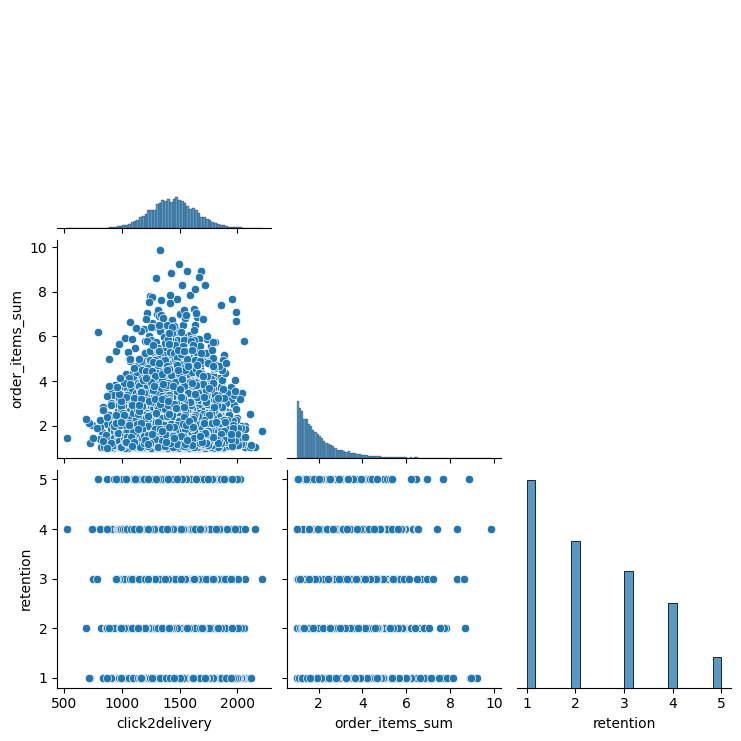

In [65]:
sns.pairplot(df[["click2delivery", "order_items_sum", "retention"]], corner=True);

## Task 6

Create a graph that comprehensively describes the dependency of delivery time on order number.

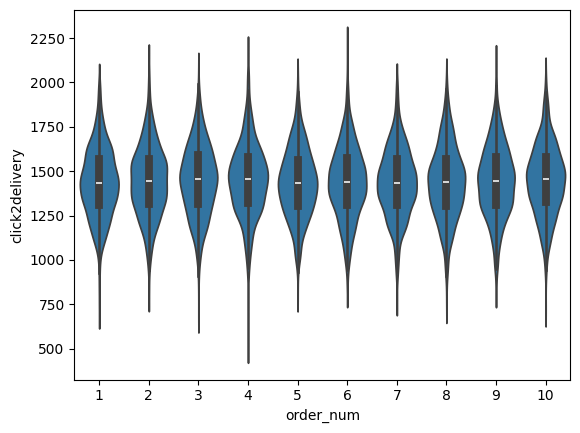

In [66]:
sns.violinplot(data=df[["click2delivery", "order_num"]], x="order_num", y="click2delivery");